In [1]:
import matplotlib.pyplot as plt
import wce
import numpy as np


<center><strong>Input</strong></center>

In [2]:
E_START = 91.19*1e9 # Energy from which to start the evolution

E_transitions = [E_START, 20e12, 30e12, 40e12] # Energies in eV at which new physics is expected

E_END = 100e12 # Energy at which to stop the evolution

# N, J, K, L values at each Energy
NJKL_val = [
    [0, 0, 0, 0], # E = 91.19 GeV
    [1, 1, 0, 1], # E = 20 TeV
    [1, 0, 1, 2], # E = 30 TeV
    [1, 2, 1, 1], # E = 40 TeV
]
# If -1, we remove the corresponding term from the evolution equation

X_val = [0, 0, 1, 1] # X values at each Energy


In [3]:
# Define Intitial Conditions for the Couplings y_un, y_dn, g_1j, g_2k, g_3l at every energy

# at E[0]
initial_couplings_0 = [
    [1], # y_u0
    [1], # y_d0

    [1], # g_10
    [1], # g_20
    [1], # g_30
]

# at E[1]
initial_couplings_1 = [
    [None, 1],
    [None, 1],

    [None, 1],
    [None],
    [None, 1],
]
# If None, it will take the coupling evaluated after evolving from previous energy

# at E[2]
initial_couplings_2 = [
    [None, None],
    [None, None],

    [None],
    [None, 1],
    [None, None, 1],
]

# at E[3]
initial_couplings_3 = [
    [None, None],
    [None, None],

    [None, 1, 1],
    [None, None],
    [None, None],
]

initial_couplings = [
    initial_couplings_0,
    initial_couplings_1,
    initial_couplings_2,
    initial_couplings_3,
]

# Define Initial values for Wilson coefficients
initial_wc = [1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0]


<center><strong>Plotting</strong></center>

In [4]:
# EVOLVE THE SYSTEM
t_solutions, y_solutions = wce.evolve(E_transitions, NJKL_val, X_val, initial_couplings, initial_wc, E_END)[:2]

wilson_coefficients = [y_sol['wc'] for y_sol in y_solutions]
energy_solutions = np.exp(t_solutions)*1e-12# Energy in TeV

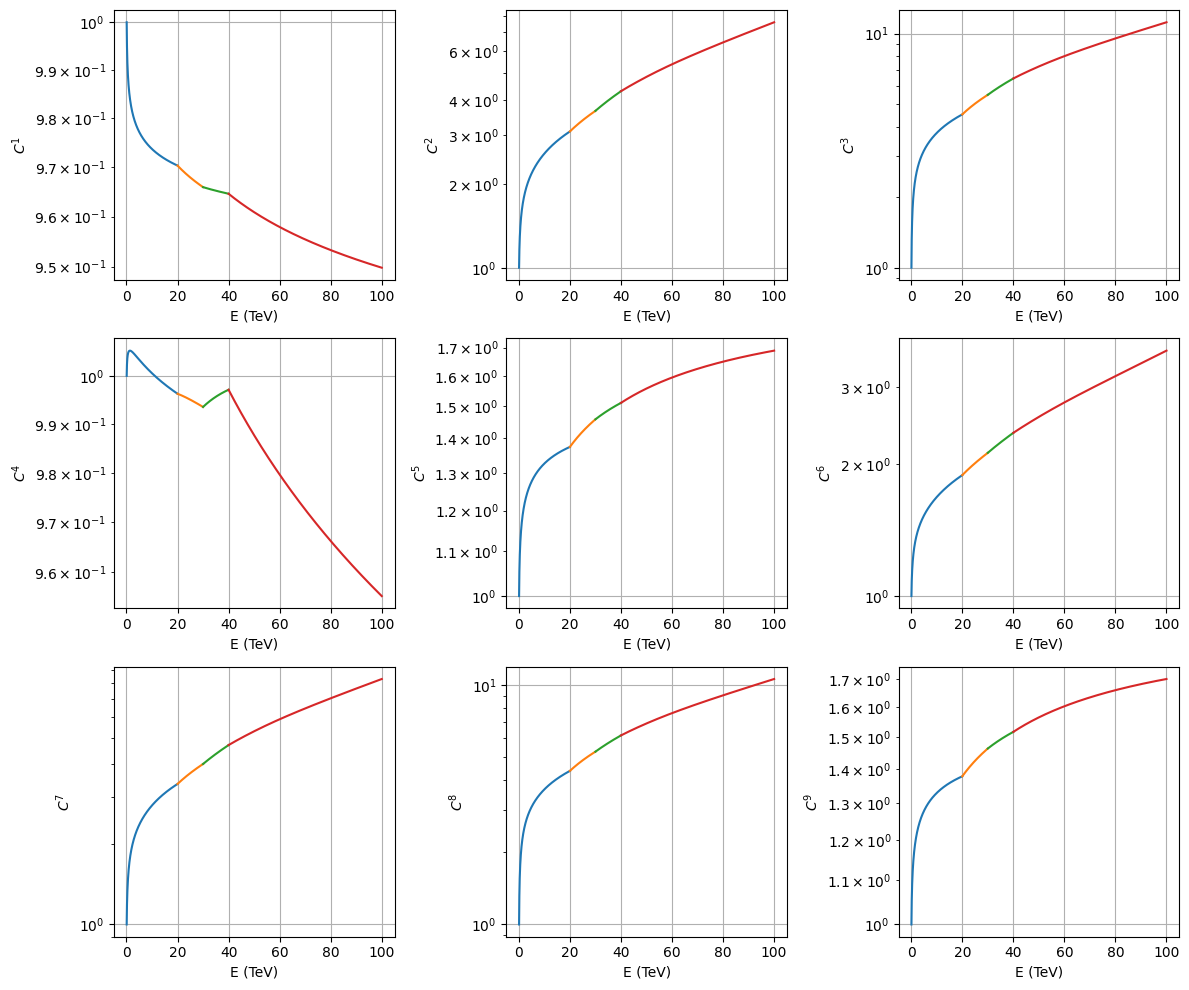

In [5]:
# PLOTTING THE WILSON COEFFICIENTS
fig, axs = plt.subplots(3, 3, figsize=(12, 10))
axs = axs.flatten()

# Plot each wilson coefficient
for i in range(9):
    for e, wc in zip(energy_solutions, wilson_coefficients):
        axs[i].plot(e, wc[i])
    axs[i].set_xlabel("E (TeV)")
    axs[i].set_ylabel(f"$C^{(i+1)}$")
    axs[i].grid(True)
    axs[i].set_yscale('log')

plt.tight_layout()
plt.show()

<center><strong>Lambda evolution</strong></center>

In [6]:
alpha = -0.01257 * 1e27 # eV^3
beta = 0.01269 * 1e27 # eV^3

A = [alpha**2, -alpha*beta, alpha*beta, beta**2, -beta**2, -beta**2, alpha**2, alpha**2, beta**2]

delta_m = 1e-29*1e9 # eV




In [7]:
Lambda = np.zeros_like(wilson_coefficients)
for i, wc in enumerate(wilson_coefficients):
    Lambda[i] = np.array([(np.abs(wc[j]*A[j]/delta_m))**(1/5) for j in range(len(wc))])


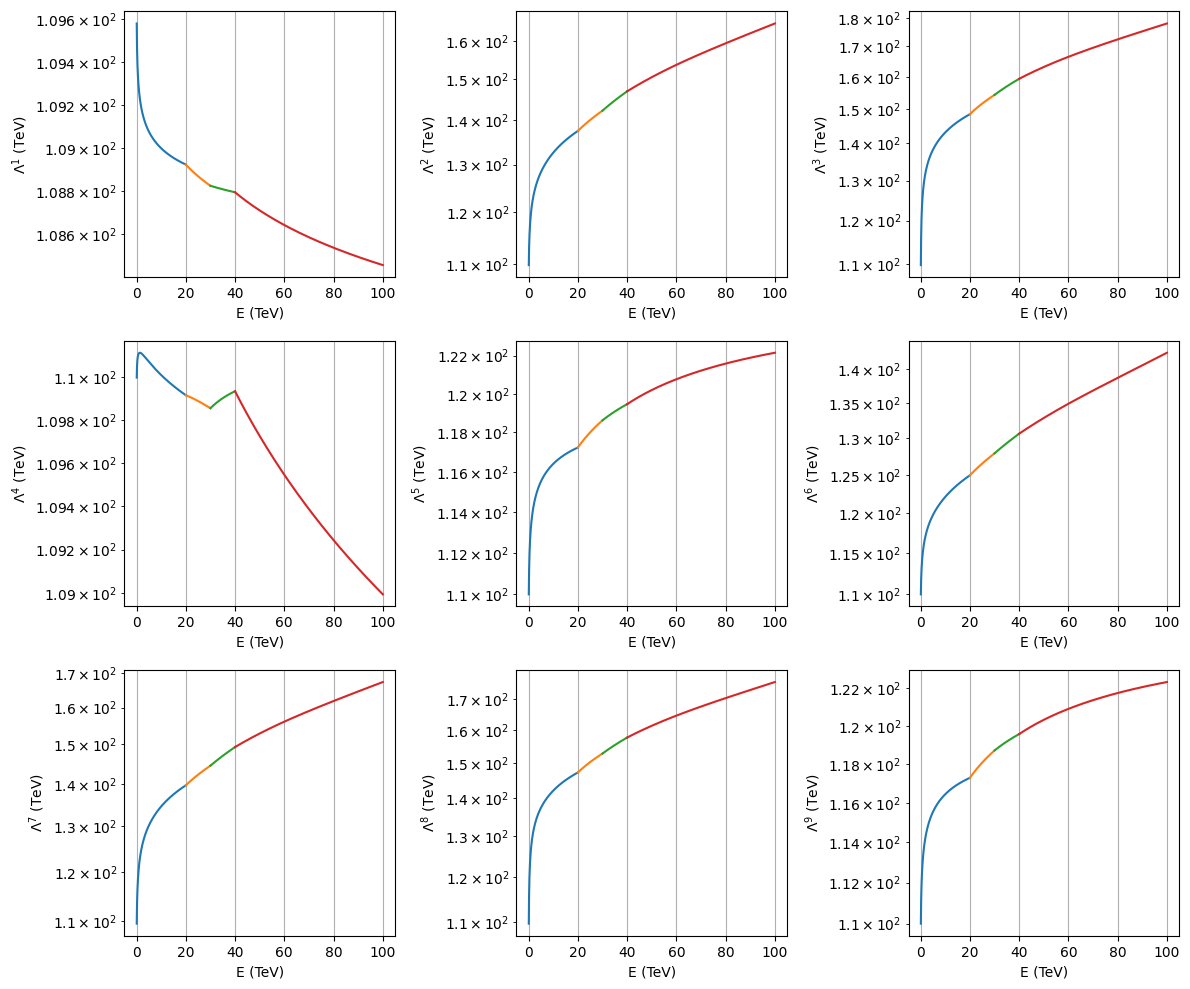

In [8]:
# PLOTTING THE EVOLUTION OF LAMBDA
fig, axs = plt.subplots(3, 3, figsize=(12, 10))
axs = axs.flatten()

# Plot each Lambda
for i in range(9):
    for e, wc in zip(energy_solutions, Lambda*1e-12): # In TeV
        axs[i].plot(e, wc[i])
    axs[i].set_xlabel("E (TeV)")
    axs[i].set_ylabel(f"$\Lambda^{(i+1)}$ (TeV)")
    axs[i].grid(True)
    axs[i].set_yscale('log')

plt.tight_layout()
plt.show()